In [7]:
import pandas as pd

In [9]:
# jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000
# NotebookApp.iopub_data_rate_limit = 10000000

In [324]:
directory = "/home/basa/AR_yolact/"
with open(directory +"yolact_base-old.txt") as f:
    f =  f.readlines()
f

['{"type": "session", "session": 0, "data": {"autoscale": true, "batch_alloc": null, "batch_size": 8, "config": "yolact_base_config", "cuda": true, "dataset": null, "decay": 0.0005, "gamma": 0.1, "interrupt": true, "keep_latest": false, "keep_latest_interval": 100000, "log": true, "log_folder": "logs/", "log_gpu": false, "lr": 0.001, "momentum": 0.9, "num_workers": 4, "resume": null, "save_folder": "weights/", "save_interval": 10000, "start_iter": -1, "validation_epoch": 2, "validation_size": 5000}, "time": 1592418447.410912}\n',
 '{"type": "train", "session": 0, "data": {"loss": {"B": 5.23312, "M": 6.30713, "C": 25.71429, "S": 31.58851, "T": 68.84306}, "epoch": 0, "iter": 0, "lr": 0.0001, "elapsed": 12.822055101394653}, "time": 1592418462.8788955}\n',
 '{"type": "train", "session": 0, "data": {"loss": {"B": 5.47407, "M": 6.03264, "C": 23.73454, "S": 30.33422, "T": 65.57548}, "epoch": 0, "iter": 1, "lr": 0.0001018, "elapsed": 0.9079098701477051}, "time": 1592418463.786463}\n',
 '{"type

In [274]:
from ast import literal_eval
import json 
nw_f = []
for n in f:
    res = json.loads(n) 
    nw_f.append(res)

## Loss Keys:
####  - B: Box Localization Loss 
####  - C: Class Confidence Loss 
####  - M: Mask Loss 
####  - P: Prototype Loss 
###  - D: Coefficient Diversity Loss 
####  - E: Class Existence Loss 
####  - S: Semantic Segmentation Loss 

In [259]:
import pandas as pd
nw_fdf = pd.DataFrame(nw_f)
nw_fdf = nw_fdf[nw_fdf["type"]=="train"]
# d=list(nw_fdf["session"])
tot_ls = {}
for u in range(d[-1]):
    tot_ls[u] = (nw_fdf[nw_fdf["session"]==u])
# Extraxt the data that contains the losses
dt_dic = {}
# print(tot_ls[5])
dt_dic_df = {}
for we in tot_ls.keys():
    dt_dic[we] = []
    for a in range(len(tot_ls[we])):
        dt_dic[we].append(tot_ls[we].iloc[a,2])
    dt_dic_df[we] = pd.DataFrame(dt_dic[we])
# print(dt_dic[27])
#Generate the dataframe of the different losses
dt_dic2  = {}
dt_dic2_df = {}
for p in dt_dic_df.keys():
    dt_dic2[p] = []
    if len(dt_dic_df[p]) > 1:
        for n in range(len(dt_dic_df[p])):
            dt_dic2[p].append(dt_dic_df[p].iloc[n,0])
        dt_dic2_df[p]  = pd.DataFrame(dt_dic2[p])
    else:
        del dt_dic2[p]
dt_dic2_df[2]

,B,M,C,S,T
0,5.93576,6.53608,23.36203,28.40317,64.23705
1,6.03413,7.15315,20.98104,27.64135,61.80967
2,5.39259,6.52142,18.27076,26.27922,56.46399
3,6.00099,6.28311,17.31844,24.58017,54.18271
4,5.41593,7.09397,16.91441,22.75585,52.18017
...,...,...,...,...,...
2116,0.58157,1.21060,0.33214,0.08121,2.20551
2117,0.44774,1.00632,0.28393,0.10746,1.84545
2118,0.62551,0.92310,0.63812,0.12381,2.31054
2119,0.46181,0.97248,0.32834,0.03320,1.79582


In [314]:
from ast import literal_eval
import json 
import pandas as pd
import matplotlib.pyplot as plt
import tkinter as tk
import os
import time
from pathlib import Path
from tkinter import filedialog, simpledialog

def uichoosefile(title = None, initialdir = None):
    root = tk.Tk()
    root.withdraw() # we don't want a full GUI, so keep the root window from appearing
    filename = tk.filedialog.askopenfilename(title=title, initialdir = initialdir)
    return filename
def loss_values_analysis(file):
    with open(file) as f:
        f =  f.readlines()
    nw_f = []
    # unstring the string dataset
    for n in f:
        res = json.loads(n) 
        nw_f.append(res)
    # convert the dictionary to dataframe
    nw_fdf = pd.DataFrame(nw_f)
    nw_fdf = nw_fdf[nw_fdf["type"]=="train"]
    tot_ls = {}
    for u in range(d[-1]):
        tot_ls[u] = (nw_fdf[nw_fdf["session"]==u])
    # Extraxt the data that contains the losses
    dt_dic = {}
    dt_dic_df = {}
    for we in tot_ls.keys():
        dt_dic[we] = []
        for a in range(len(tot_ls[we])):
            dt_dic[we].append(tot_ls[we].iloc[a,2])
        dt_dic_df[we] = pd.DataFrame(dt_dic[we])
    #Generate the dataframe of the different losses
    dt_dic2  = {}
    dt_dic2_df = {}
    for p in dt_dic_df.keys():
        dt_dic2[p] = []
        if len(dt_dic_df[p]) > 1:
            for n in range(len(dt_dic_df[p])):
                dt_dic2[p].append(dt_dic_df[p].iloc[n,0])
            dt_dic2_df[p]  = pd.DataFrame(dt_dic2[p])
        else:
            del dt_dic2[p]
    return dt_dic2_df

In [320]:
# loss_values_analysis(file = "/home/basa/AR_yolact/yolact_base-old.log")
# loss_values_analysis(uichoosefile())


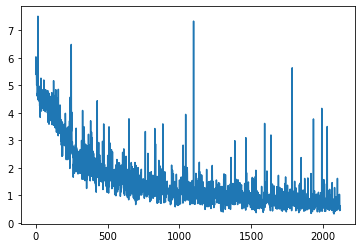

In [304]:
plt.plot(dt_dic2_df[2]["B"])

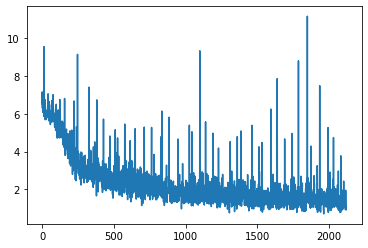

In [305]:
plt.plot(dt_dic2_df[2]["M"])

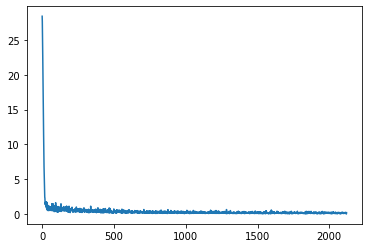

In [293]:
plt.plot(dt_dic2_df[2]["S"])

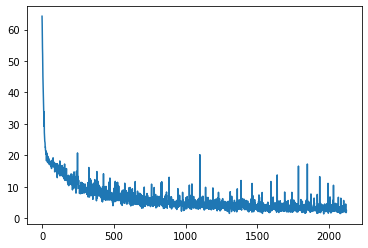

In [294]:
plt.plot(dt_dic2_df[2]["T"])

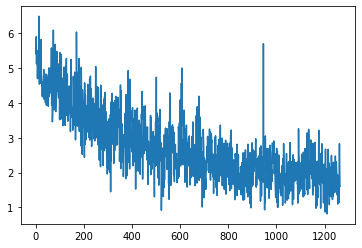

In [265]:
plt.plot(dt_dic2_df[21]["B"])

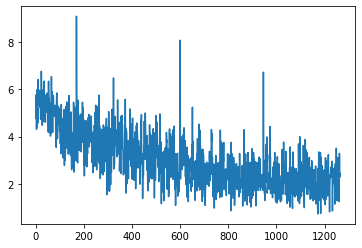

In [266]:
plt.plot(dt_dic2_df[21]["M"])

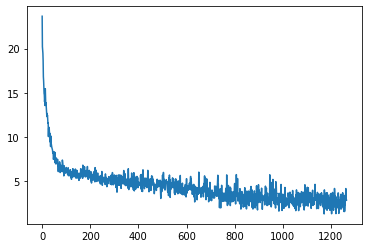

In [267]:
plt.plot(dt_dic2_df[21]["C"])

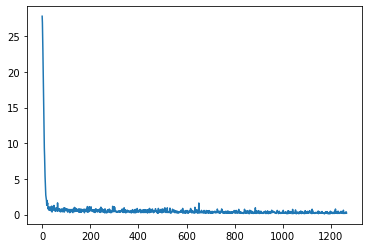

In [268]:
plt.plot(dt_dic2_df[21]["S"])

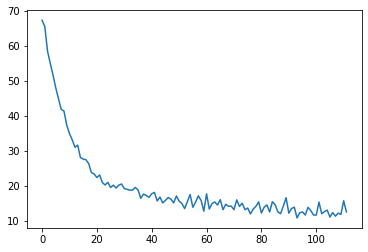

In [269]:
plt.plot(dt_dic2_df[19]["T"])

In [297]:
# import pandas as pd
# nw_fdf = pd.DataFrame(nw_f)
# nw_fdf=nw_fdf[nw_fdf["type"]=="train"]
# nw_fdf["session"]
# tot_ls = {}
# for u in nw_fdf["session"].unique():

#     tot_ls[u] = (nw_fdf[nw_fdf["session"]==u])
# dt_dic = {}
# dt_dic_df = {}
# # print(tot_ls.keys())
# for we in tot_ls.keys():
#     dt_dic[we] = []
# #     tot_df[we] = []
#     for a in range(len(tot_ls[we])):
#         if len(tot_ls[we])>1:
#             dt_dic[we].append(tot_ls[we].iloc[a,2])
# dt_dic_df = {}
# for yo in dt_dic.keys():
#         dt_dic_df[yo] = pd.DataFrame(dt_dic[yo])
        
# # dt_dic_df.keys()
# dt_dic2  = {}
# dt_dic2_df = {}
# for p in dt_dic_df.keys():
#     dt_dic2[p] = []
#     if "loss" in dt_dic_df[p].columns:
#         for n in range(len(dt_dic_df[p])):
#             dt_dic2[p].append(dt_dic_df[p].loc[n,"loss"])
#         dt_dic2_df[p]  = pd.DataFrame(dt_dic2[p])
#     else:
#         del dt_dic2[p]
# dt_dic_df[9]

In [271]:
for g in range(5):
    print(int(g))

0
1
2
3
4


In [272]:
# import pandas as pd
# nw_fdf = pd.DataFrame(nw_f)

# nw_fdf["session"].unique()
# tot_ls = {}
# for u in nw_fdf["session"].unique():
# #     print(type(u))
# #     u = int(u)
#     tot_ls[u] = (nw_fdf[nw_fdf["session"]==u])
# # tot_ls
# dt_dic = {}
# print(tot_ls.keys())
# for we in tot_ls.keys():
# #     print(type(we))
#     dt_dic[we] = []
# #     tot_df[we] = []
#     for a in range(len(tot_ls[we])):
# #         if len(tot_ls[we])>1:
#         dt_dic[we].append(tot_ls[we].iloc[a,2])
# dt_dic_df = {}
# for yo in dt_dic.keys():
#         dt_dic_df[yo] = pd.DataFrame(dt_dic[yo])
# # type(dt_dic_df.keys())
# dt_dic2  = {}
# dt_dic2_df = {}
# for p in dt_dic_df.keys():
# #     print(type(p))
#     dt_dic2[p] = []
#     if "loss" in dt_dic_df[p].columns:
#         for n in range(len(dt_dic_df[p])):
#             dt_dic2[p].append(dt_dic_df[p].loc[n,"loss"])
#         dt_dic2_df[p]  = pd.DataFrame(dt_dic2[p])
#     else:
#         del dt_dic2[p]
# # dt_dic2_df
# t_df = {}

# tt = {}
# for m in dt_dic2_df.keys():
# #     print(type(m))
#     tt_df[m] = []
#     for n in range(1, len(dt_dic2_df[m])):
#         tt_df[m].append(dt_dic2_df[m].iloc[n,0])
#     tt[m]= pd.DataFrame(tt_df[m])


In [ ]:
import matplotlib.pyplot as plt
# plt.plot(tt[30]["T"])

In [189]:
tt

{}

In [228]:
# dt_dic2  = {}
# dt_dic2_df = {}
# for p in dt_dic_df.keys():
#     dt_dic2[p] = []
#     for n in range(len(dt_dic_df[p])):
#         dt_dic2[p].append(dt_dic_df[p].iloc[n,-4])
#     dt_dic2_df[p]  = pd.DataFrame(dt_dic2[p])
# dt_dic2_df[1]

In [224]:
dt_dic_df[9].iloc[3,-4]

{'B': 5.8718, 'M': 6.65756, 'C': 18.70279, 'S': 33.2461, 'T': 64.47826}

In [ ]:
#         dt_dic2[p].append(dt_dic_df[p].iloc[n,0])
#     dt_dic2_df[p]  = pd.DataFrame(dt_dic2[p])
# dt_dic2[27]